In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_model_with_attention

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 1.2234 - categorical cross entropy: 1.2234 - mean squared error: 0.0779 - accuracy: 0.6347 - auc: 0.6620 - prc: 0.1961

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_1\assets


29/29 [==============================] - 157s 3s/step - loss: 1.2234 - categorical cross entropy: 1.2234 - mean squared error: 0.0779 - accuracy: 0.6347 - auc: 0.6620 - prc: 0.1961 - val_loss: 1.4987 - val_categorical cross entropy: 1.4987 - val_mean squared error: 0.1001 - val_accuracy: 0.6705 - val_auc: 0.4975 - val_prc: 0.1425 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - ETA: 0s - loss: 0.9256 - categorical cross entropy: 0.9256 - mean squared error: 0.0601 - accuracy: 0.6778 - auc: 0.7889 - prc: 0.2504

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_2\assets


29/29 [==============================] - 72s 3s/step - loss: 0.9256 - categorical cross entropy: 0.9256 - mean squared error: 0.0601 - accuracy: 0.6778 - auc: 0.7889 - prc: 0.2504 - val_loss: 1.4912 - val_categorical cross entropy: 1.4912 - val_mean squared error: 0.1009 - val_accuracy: 0.6705 - val_auc: 0.4707 - val_prc: 0.1362 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - 15s 504ms/step - loss: 0.8574 - categorical cross entropy: 0.8574 - mean squared error: 0.0570 - accuracy: 0.6762 - auc: 0.8291 - prc: 0.2571 - val_loss: 1.5905 - val_categorical cross entropy: 1.5905 - val_mean squared error: 0.0677 - val_accuracy: 0.6705 - val_auc: 0.7016 - val_prc: 0.2090 - lr: 0.0010
Epoch 4/200
29/29 [==============================] - ETA: 0s - loss: 0.9014 - categorical cross entropy: 0.9014 - mean squared error: 0.0604 - accuracy: 0.6638 - auc: 0.8055 - prc: 0.2504

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_4\assets


29/29 [==============================] - 71s 3s/step - loss: 0.9014 - categorical cross entropy: 0.9014 - mean squared error: 0.0604 - accuracy: 0.6638 - auc: 0.8055 - prc: 0.2504 - val_loss: 1.0813 - val_categorical cross entropy: 1.0813 - val_mean squared error: 0.0714 - val_accuracy: 0.6705 - val_auc: 0.7203 - val_prc: 0.2175 - lr: 0.0010
Epoch 5/200
29/29 [==============================] - 18s 632ms/step - loss: 0.8804 - categorical cross entropy: 0.8804 - mean squared error: 0.0578 - accuracy: 0.6740 - auc: 0.8186 - prc: 0.2656 - val_loss: 1.6829 - val_categorical cross entropy: 1.6829 - val_mean squared error: 0.1095 - val_accuracy: 0.6705 - val_auc: 0.4458 - val_prc: 0.1259 - lr: 0.0010
Epoch 6/200
29/29 [==============================] - 14s 496ms/step - loss: 0.8091 - categorical cross entropy: 0.8091 - mean squared error: 0.0547 - accuracy: 0.7037 - auc: 0.8261 - prc: 0.2668 - val_loss: 94.7957 - val_categorical cross entropy: 94.7957 - val_mean squared error: 0.0942 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_10\assets


29/29 [==============================] - 74s 3s/step - loss: 0.7852 - categorical cross entropy: 0.7852 - mean squared error: 0.0527 - accuracy: 0.7161 - auc: 0.8562 - prc: 0.3119 - val_loss: 1.0108 - val_categorical cross entropy: 1.0108 - val_mean squared error: 0.0624 - val_accuracy: 0.6785 - val_auc: 0.7869 - val_prc: 0.3240 - lr: 0.0010
Epoch 11/200
29/29 [==============================] - ETA: 0s - loss: 0.8462 - categorical cross entropy: 0.8462 - mean squared error: 0.0566 - accuracy: 0.6923 - auc: 0.8472 - prc: 0.3090

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_11\assets


29/29 [==============================] - 75s 3s/step - loss: 0.8462 - categorical cross entropy: 0.8462 - mean squared error: 0.0566 - accuracy: 0.6923 - auc: 0.8472 - prc: 0.3090 - val_loss: 0.9471 - val_categorical cross entropy: 0.9471 - val_mean squared error: 0.0586 - val_accuracy: 0.7010 - val_auc: 0.8240 - val_prc: 0.3461 - lr: 0.0010
Epoch 12/200
29/29 [==============================] - 12s 409ms/step - loss: 0.8347 - categorical cross entropy: 0.8347 - mean squared error: 0.0567 - accuracy: 0.6848 - auc: 0.8512 - prc: 0.3400 - val_loss: 2.4234 - val_categorical cross entropy: 2.4234 - val_mean squared error: 0.0859 - val_accuracy: 0.6200 - val_auc: 0.6688 - val_prc: 0.2276 - lr: 0.0010
Epoch 13/200
29/29 [==============================] - ETA: 0s - loss: 0.8071 - categorical cross entropy: 0.8071 - mean squared error: 0.0534 - accuracy: 0.7188 - auc: 0.8532 - prc: 0.3163

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_13\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_13\assets


29/29 [==============================] - 74s 3s/step - loss: 0.8071 - categorical cross entropy: 0.8071 - mean squared error: 0.0534 - accuracy: 0.7188 - auc: 0.8532 - prc: 0.3163 - val_loss: 0.9194 - val_categorical cross entropy: 0.9194 - val_mean squared error: 0.0592 - val_accuracy: 0.6860 - val_auc: 0.8106 - val_prc: 0.3011 - lr: 0.0010
Epoch 14/200
29/29 [==============================] - 12s 414ms/step - loss: 0.7317 - categorical cross entropy: 0.7317 - mean squared error: 0.0506 - accuracy: 0.7344 - auc: 0.8810 - prc: 0.3774 - val_loss: 3.4416 - val_categorical cross entropy: 3.4416 - val_mean squared error: 0.1122 - val_accuracy: 0.5615 - val_auc: 0.5922 - val_prc: 0.1862 - lr: 0.0010
Epoch 15/200
29/29 [==============================] - ETA: 0s - loss: 0.7923 - categorical cross entropy: 0.7923 - mean squared error: 0.0534 - accuracy: 0.7161 - auc: 0.8652 - prc: 0.3580

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_15\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_15\assets


29/29 [==============================] - 72s 3s/step - loss: 0.7923 - categorical cross entropy: 0.7923 - mean squared error: 0.0534 - accuracy: 0.7161 - auc: 0.8652 - prc: 0.3580 - val_loss: 0.8245 - val_categorical cross entropy: 0.8245 - val_mean squared error: 0.0562 - val_accuracy: 0.6825 - val_auc: 0.8585 - val_prc: 0.3735 - lr: 0.0010
Epoch 16/200
29/29 [==============================] - 12s 414ms/step - loss: 0.7818 - categorical cross entropy: 0.7818 - mean squared error: 0.0540 - accuracy: 0.7139 - auc: 0.8674 - prc: 0.3847 - val_loss: 0.9075 - val_categorical cross entropy: 0.9075 - val_mean squared error: 0.0625 - val_accuracy: 0.6690 - val_auc: 0.8239 - val_prc: 0.3809 - lr: 0.0010
Epoch 17/200
29/29 [==============================] - 12s 415ms/step - loss: 0.8240 - categorical cross entropy: 0.8240 - mean squared error: 0.0564 - accuracy: 0.6988 - auc: 0.8517 - prc: 0.3426 - val_loss: 0.8349 - val_categorical cross entropy: 0.8349 - val_mean squared error: 0.0573 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_21\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_21\assets


29/29 [==============================] - 87s 3s/step - loss: 0.8110 - categorical cross entropy: 0.8110 - mean squared error: 0.0554 - accuracy: 0.7042 - auc: 0.8643 - prc: 0.3528 - val_loss: 0.7918 - val_categorical cross entropy: 0.7918 - val_mean squared error: 0.0547 - val_accuracy: 0.6950 - val_auc: 0.8524 - val_prc: 0.3943 - lr: 0.0010
Epoch 22/200
29/29 [==============================] - ETA: 0s - loss: 0.7969 - categorical cross entropy: 0.7969 - mean squared error: 0.0551 - accuracy: 0.7074 - auc: 0.8678 - prc: 0.3882

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_22\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_22\assets


29/29 [==============================] - 71s 3s/step - loss: 0.7969 - categorical cross entropy: 0.7969 - mean squared error: 0.0551 - accuracy: 0.7074 - auc: 0.8678 - prc: 0.3882 - val_loss: 0.7414 - val_categorical cross entropy: 0.7414 - val_mean squared error: 0.0519 - val_accuracy: 0.7245 - val_auc: 0.8775 - val_prc: 0.4256 - lr: 0.0010
Epoch 23/200
29/29 [==============================] - 12s 416ms/step - loss: 0.8027 - categorical cross entropy: 0.8027 - mean squared error: 0.0554 - accuracy: 0.7053 - auc: 0.8630 - prc: 0.4008 - val_loss: 0.8340 - val_categorical cross entropy: 0.8340 - val_mean squared error: 0.0556 - val_accuracy: 0.6910 - val_auc: 0.8297 - val_prc: 0.3224 - lr: 0.0010
Epoch 24/200
29/29 [==============================] - 12s 411ms/step - loss: 0.7896 - categorical cross entropy: 0.7896 - mean squared error: 0.0543 - accuracy: 0.7107 - auc: 0.8548 - prc: 0.3616 - val_loss: 0.8452 - val_categorical cross entropy: 0.8452 - val_mean squared error: 0.0598 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_37\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_37\assets


29/29 [==============================] - 98s 3s/step - loss: 0.7026 - categorical cross entropy: 0.7026 - mean squared error: 0.0498 - accuracy: 0.7365 - auc: 0.8982 - prc: 0.4361 - val_loss: 0.7099 - val_categorical cross entropy: 0.7099 - val_mean squared error: 0.0499 - val_accuracy: 0.7365 - val_auc: 0.8930 - val_prc: 0.4617 - lr: 9.5000e-04
Epoch 38/200
29/29 [==============================] - 12s 415ms/step - loss: 0.7104 - categorical cross entropy: 0.7104 - mean squared error: 0.0496 - accuracy: 0.7408 - auc: 0.9002 - prc: 0.4474 - val_loss: 0.7993 - val_categorical cross entropy: 0.7993 - val_mean squared error: 0.0562 - val_accuracy: 0.6900 - val_auc: 0.8841 - val_prc: 0.4437 - lr: 9.5000e-04
Epoch 39/200
29/29 [==============================] - 12s 414ms/step - loss: 0.6881 - categorical cross entropy: 0.6881 - mean squared error: 0.0482 - accuracy: 0.7565 - auc: 0.9019 - prc: 0.4723 - val_loss: 0.9699 - val_categorical cross entropy: 0.9699 - val_mean squared error: 0.0673 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_42\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_42\assets


29/29 [==============================] - 77s 3s/step - loss: 0.7416 - categorical cross entropy: 0.7416 - mean squared error: 0.0513 - accuracy: 0.7355 - auc: 0.8928 - prc: 0.4242 - val_loss: 0.7080 - val_categorical cross entropy: 0.7080 - val_mean squared error: 0.0497 - val_accuracy: 0.7505 - val_auc: 0.8920 - val_prc: 0.4660 - lr: 9.5000e-04
Epoch 43/200
29/29 [==============================] - 12s 420ms/step - loss: 0.7592 - categorical cross entropy: 0.7592 - mean squared error: 0.0536 - accuracy: 0.7182 - auc: 0.8935 - prc: 0.4366 - val_loss: 0.7989 - val_categorical cross entropy: 0.7989 - val_mean squared error: 0.0546 - val_accuracy: 0.7115 - val_auc: 0.8628 - val_prc: 0.4156 - lr: 9.5000e-04
Epoch 44/200
29/29 [==============================] - 12s 416ms/step - loss: 0.7474 - categorical cross entropy: 0.7474 - mean squared error: 0.0525 - accuracy: 0.7311 - auc: 0.8866 - prc: 0.4119 - val_loss: 0.8279 - val_categorical cross entropy: 0.8279 - val_mean squared error: 0.0564 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_49\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_49\assets


29/29 [==============================] - 84s 3s/step - loss: 0.6802 - categorical cross entropy: 0.6802 - mean squared error: 0.0478 - accuracy: 0.7559 - auc: 0.8975 - prc: 0.4940 - val_loss: 0.6854 - val_categorical cross entropy: 0.6854 - val_mean squared error: 0.0486 - val_accuracy: 0.7445 - val_auc: 0.8932 - val_prc: 0.5164 - lr: 9.5000e-04
Epoch 50/200
29/29 [==============================] - ETA: 0s - loss: 0.6657 - categorical cross entropy: 0.6657 - mean squared error: 0.0476 - accuracy: 0.7587 - auc: 0.9128 - prc: 0.5090

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_50\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_50\assets


29/29 [==============================] - 72s 3s/step - loss: 0.6657 - categorical cross entropy: 0.6657 - mean squared error: 0.0476 - accuracy: 0.7587 - auc: 0.9128 - prc: 0.5090 - val_loss: 0.6789 - val_categorical cross entropy: 0.6789 - val_mean squared error: 0.0481 - val_accuracy: 0.7520 - val_auc: 0.8952 - val_prc: 0.5159 - lr: 9.5000e-04
Epoch 51/200
29/29 [==============================] - 12s 415ms/step - loss: 0.6385 - categorical cross entropy: 0.6385 - mean squared error: 0.0457 - accuracy: 0.7575 - auc: 0.9195 - prc: 0.5124 - val_loss: 0.6906 - val_categorical cross entropy: 0.6906 - val_mean squared error: 0.0489 - val_accuracy: 0.7410 - val_auc: 0.8992 - val_prc: 0.5189 - lr: 9.5000e-04
Epoch 52/200
29/29 [==============================] - 12s 413ms/step - loss: 0.7108 - categorical cross entropy: 0.7108 - mean squared error: 0.0500 - accuracy: 0.7435 - auc: 0.8994 - prc: 0.5003 - val_loss: 0.7244 - val_categorical cross entropy: 0.7244 - val_mean squared error: 0.0499 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_54\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_54\assets


29/29 [==============================] - 80s 3s/step - loss: 0.6444 - categorical cross entropy: 0.6444 - mean squared error: 0.0454 - accuracy: 0.7681 - auc: 0.9133 - prc: 0.5146 - val_loss: 0.6535 - val_categorical cross entropy: 0.6535 - val_mean squared error: 0.0465 - val_accuracy: 0.7655 - val_auc: 0.9005 - val_prc: 0.5431 - lr: 9.5000e-04
Epoch 55/200
29/29 [==============================] - 13s 436ms/step - loss: 0.6620 - categorical cross entropy: 0.6620 - mean squared error: 0.0466 - accuracy: 0.7597 - auc: 0.9119 - prc: 0.5206 - val_loss: 0.6842 - val_categorical cross entropy: 0.6842 - val_mean squared error: 0.0482 - val_accuracy: 0.7565 - val_auc: 0.9074 - val_prc: 0.5378 - lr: 9.5000e-04
Epoch 56/200
29/29 [==============================] - ETA: 0s - loss: 0.6325 - categorical cross entropy: 0.6325 - mean squared error: 0.0450 - accuracy: 0.7681 - auc: 0.9142 - prc: 0.5570

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_56\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_56\assets


29/29 [==============================] - 76s 3s/step - loss: 0.6325 - categorical cross entropy: 0.6325 - mean squared error: 0.0450 - accuracy: 0.7681 - auc: 0.9142 - prc: 0.5570 - val_loss: 0.6526 - val_categorical cross entropy: 0.6526 - val_mean squared error: 0.0468 - val_accuracy: 0.7550 - val_auc: 0.9102 - val_prc: 0.5445 - lr: 9.5000e-04
Epoch 57/200
29/29 [==============================] - 12s 418ms/step - loss: 0.6516 - categorical cross entropy: 0.6516 - mean squared error: 0.0460 - accuracy: 0.7672 - auc: 0.9127 - prc: 0.5526 - val_loss: 0.7072 - val_categorical cross entropy: 0.7072 - val_mean squared error: 0.0496 - val_accuracy: 0.7305 - val_auc: 0.8972 - val_prc: 0.5059 - lr: 9.5000e-04
Epoch 58/200
29/29 [==============================] - 12s 419ms/step - loss: 0.6335 - categorical cross entropy: 0.6335 - mean squared error: 0.0452 - accuracy: 0.7694 - auc: 0.9196 - prc: 0.5219 - val_loss: 0.8290 - val_categorical cross entropy: 0.8290 - val_mean squared error: 0.0552 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_63\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_63\assets


29/29 [==============================] - 82s 3s/step - loss: 0.6313 - categorical cross entropy: 0.6313 - mean squared error: 0.0452 - accuracy: 0.7667 - auc: 0.9277 - prc: 0.5222 - val_loss: 0.6374 - val_categorical cross entropy: 0.6374 - val_mean squared error: 0.0451 - val_accuracy: 0.7705 - val_auc: 0.9131 - val_prc: 0.5720 - lr: 9.5000e-04
Epoch 64/200
29/29 [==============================] - 12s 417ms/step - loss: 0.6680 - categorical cross entropy: 0.6680 - mean squared error: 0.0472 - accuracy: 0.7629 - auc: 0.9100 - prc: 0.5068 - val_loss: 0.8055 - val_categorical cross entropy: 0.8055 - val_mean squared error: 0.0559 - val_accuracy: 0.7040 - val_auc: 0.8680 - val_prc: 0.4282 - lr: 9.5000e-04
Epoch 65/200
29/29 [==============================] - 12s 406ms/step - loss: 0.6538 - categorical cross entropy: 0.6538 - mean squared error: 0.0464 - accuracy: 0.7565 - auc: 0.9123 - prc: 0.4964 - val_loss: 0.7848 - val_categorical cross entropy: 0.7848 - val_mean squared error: 0.0555 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_76\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_76\assets


29/29 [==============================] - 87s 3s/step - loss: 0.6302 - categorical cross entropy: 0.6302 - mean squared error: 0.0450 - accuracy: 0.7721 - auc: 0.9232 - prc: 0.5819 - val_loss: 0.6343 - val_categorical cross entropy: 0.6343 - val_mean squared error: 0.0455 - val_accuracy: 0.7620 - val_auc: 0.9198 - val_prc: 0.5892 - lr: 9.0250e-04
Epoch 77/200
29/29 [==============================] - 12s 414ms/step - loss: 0.6612 - categorical cross entropy: 0.6612 - mean squared error: 0.0479 - accuracy: 0.7495 - auc: 0.9252 - prc: 0.5822 - val_loss: 0.7015 - val_categorical cross entropy: 0.7015 - val_mean squared error: 0.0499 - val_accuracy: 0.7390 - val_auc: 0.9140 - val_prc: 0.5891 - lr: 9.0250e-04
Epoch 78/200
29/29 [==============================] - ETA: 0s - loss: 0.5659 - categorical cross entropy: 0.5659 - mean squared error: 0.0409 - accuracy: 0.7942 - auc: 0.9405 - prc: 0.6448

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_78\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_dealing_with_imbalance_using_only_oversampling_3_whole_model_trainable_with_attention_module_on_top_and_200_epoch_10_78\assets


29/29 [==============================] - 84s 3s/step - loss: 0.5659 - categorical cross entropy: 0.5659 - mean squared error: 0.0409 - accuracy: 0.7942 - auc: 0.9405 - prc: 0.6448 - val_loss: 0.6151 - val_categorical cross entropy: 0.6151 - val_mean squared error: 0.0435 - val_accuracy: 0.7830 - val_auc: 0.9103 - val_prc: 0.5997 - lr: 9.0250e-04
Epoch 79/200
29/29 [==============================] - 12s 421ms/step - loss: 0.6119 - categorical cross entropy: 0.6119 - mean squared error: 0.0445 - accuracy: 0.7742 - auc: 0.9313 - prc: 0.5885 - val_loss: 0.6321 - val_categorical cross entropy: 0.6321 - val_mean squared error: 0.0443 - val_accuracy: 0.7755 - val_auc: 0.9046 - val_prc: 0.5652 - lr: 9.0250e-04
Epoch 80/200
29/29 [==============================] - 12s 420ms/step - loss: 0.6092 - categorical cross entropy: 0.6092 - mean squared error: 0.0439 - accuracy: 0.7726 - auc: 0.9299 - prc: 0.5796 - val_loss: 0.6421 - val_categorical cross entropy: 0.6421 - val_mean squared error: 0.0465 

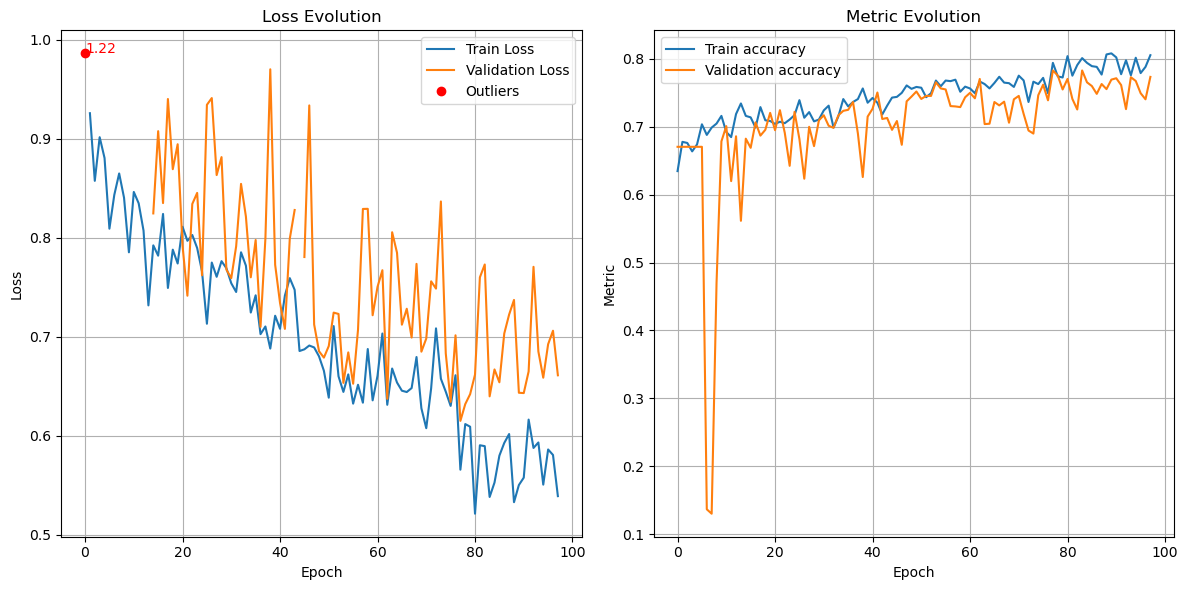

In [7]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_model_with_attention(HEIGHT, WIDTH, num_classes, metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20,
    epochs=200)